# 1. Data Preprocessing
Book1.csv is a data with stock and interest rate related characteristics 

sp500.csv has a S&P 500 return data

In [1]:
import numpy as np
import pandas as pd


z = pd.DataFrame(pd.read_csv('Book1.csv',sep=',')) 
print(z.head())
r = pd.DataFrame(pd.read_csv('sp500.csv',sep=','))

   yyyymm  Index   D12  E12  b/m  tbl  AAA  BAA  lty  ntis     Rfree  infl  \
0  187101   4.44  0.26  0.4  NaN  NaN  NaN  NaN  NaN   NaN  0.004967   NaN   
1  187102   4.50  0.26  0.4  NaN  NaN  NaN  NaN  NaN   NaN  0.004525   NaN   
2  187103   4.61  0.26  0.4  NaN  NaN  NaN  NaN  NaN   NaN  0.004252   NaN   
3  187104   4.74  0.26  0.4  NaN  NaN  NaN  NaN  NaN   NaN  0.004643   NaN   
4  187105   4.86  0.26  0.4  NaN  NaN  NaN  NaN  NaN   NaN  0.003698   NaN   

   ltr  corpr  svar  csp  CRSP_SPvw  CRSP_SPvwx  
0  NaN    NaN   NaN  NaN        NaN         NaN  
1  NaN    NaN   NaN  NaN        NaN         NaN  
2  NaN    NaN   NaN  NaN        NaN         NaN  
3  NaN    NaN   NaN  NaN        NaN         NaN  
4  NaN    NaN   NaN  NaN        NaN         NaN  


#### r contains features related to the price of s&p 500, including opening and closing price

In [2]:
r = pd.DataFrame(r.iloc[121:,:]) #from year 1938 Jan ~ 2019 Dec
print(r)

            Date         Open         High          Low        Close  \
121   1938-01-01    10.520000    11.950000    10.520000    10.690000   
122   1938-02-01    10.890000    11.680000    10.340000    11.340000   
123   1938-03-01    11.460000    11.460000     8.500000     8.500000   
124   1938-04-01     8.910000    10.450000     8.910000     9.780000   
125   1938-05-01     9.590000    10.630000     9.270000     9.270000   
126   1938-06-01     9.570000    11.720000     9.420000    11.560000   
127   1938-07-01    11.910000    12.800000    11.730000    12.330000   
128   1938-08-01    12.250000    12.730000    11.850000    12.060000   
129   1938-09-01    11.920000    12.410000    10.990000    12.240000   
130   1938-10-01    12.520000    13.910000    12.480000    13.170000   
131   1938-11-01    13.100000    13.790000    12.370000    12.730000   
132   1938-12-01    12.610000    13.140000    12.320000    13.140000   
133   1939-01-01    13.080000    13.230000    11.530000    12.30

In [3]:
#z; 1938-2019
Z = pd.DataFrame(z[z['yyyymm']>=193801])
print(Z)

      yyyymm        Index        D12         E12       b/m     tbl     AAA  \
804   193801    10.690000   0.793333    1.076670  0.701567  0.0011  0.0317   
805   193802    11.340000   0.786667    1.023330  0.659519  0.0010  0.0320   
806   193803     8.500000   0.780000    0.970000  0.892370  0.0008  0.0322   
807   193804     9.700000   0.766667    0.903333  0.790793  0.0008  0.0330   
808   193805     9.270000   0.753333    0.836667  0.819566  0.0009  0.0322   
809   193806    11.560000   0.740000    0.770000  0.659546  0.0005  0.0326   
810   193807    12.400000   0.713333    0.720000  0.625354  0.0005  0.0322   
811   193808    12.060000   0.686667    0.670000  0.634020  0.0007  0.0318   
812   193809    12.240000   0.660000    0.620000  0.624249  0.0006  0.0321   
813   193810    13.170000   0.610000    0.626667  0.581955  0.0008  0.0315   
814   193811    12.730000   0.560000    0.633333  0.589374  0.0005  0.0310   
815   193812    13.210000   0.510000    0.640000  0.572039  0.00

In [4]:
#Null value
r.isna().sum()

Date         0
Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
dtype: int64

In [5]:
Z = Z.drop(['csp'], axis=1)
print(Z.isna().sum())

yyyymm         0
Index          0
D12            0
E12            0
b/m            0
tbl            0
AAA            0
BAA            0
lty           12
ntis           0
Rfree          0
infl           0
ltr            0
corpr          0
svar           0
CRSP_SPvw      0
CRSP_SPvwx     0
dtype: int64


#### As there is a Null for dataframe Z, we fill up the Null value with mean 
#### Now, we can see that there are no null values

In [6]:
Z = Z.fillna(Z.mean())
Z.isna().sum()

yyyymm        0
Index         0
D12           0
E12           0
b/m           0
tbl           0
AAA           0
BAA           0
lty           0
ntis          0
Rfree         0
infl          0
ltr           0
corpr         0
svar          0
CRSP_SPvw     0
CRSP_SPvwx    0
dtype: int64

In [7]:
r = r.drop(['Date'], axis=1)

#### Calculate stock return from dataframe r

In [8]:
#stock return : (end-start)/start
r_p = pd.DataFrame((r['Close']-r['Open'])/r['Open']).reset_index()
r_p.columns=['index','r_p']
r_f = pd.DataFrame(Z['tbl']).reset_index() #treasury bill rate
r_f.columns = ['index','r_f']
r_m = pd.DataFrame(pd.concat([r_p,r_f], axis=1, ignore_index=True))

In [9]:
r_m.columns=['index1','r_p','index2','r_f']
r_m = r_m.drop(['index1','index2'],axis=1)

#### r_i,t is the excess return, which is the target variable

In [50]:
#compute: r_i,t 
mkt_return = pd.DataFrame(r_m['r_p']-r_m['r_f'])  
mkt_return.columns = ['r_i,t']
print(mkt_return.head())

      r_i,t
0  0.015060
1  0.040322
2 -0.259090
3  0.096843
4 -0.034268


In [11]:
print(Z.head(3))


     yyyymm  Index       D12      E12       b/m     tbl     AAA     BAA  \
804  193801  10.69  0.793333  1.07667  0.701567  0.0011  0.0317  0.0589   
805  193802  11.34  0.786667  1.02333  0.659519  0.0010  0.0320  0.0597   
806  193803   8.50  0.780000  0.97000  0.892370  0.0008  0.0322  0.0630   

        lty      ntis     Rfree      infl     ltr   corpr      svar  \
804  0.0271  0.038802  0.000083 -0.013889  0.0057  0.0038  0.009751   
805  0.0268  0.032248  0.000067 -0.007042  0.0052  0.0010  0.007772   
806  0.0273  0.033845  0.000067  0.000000 -0.0037 -0.0087  0.015068   

     CRSP_SPvw  CRSP_SPvwx  
804   0.012163    0.011096  
805   0.065757    0.061131  
806  -0.254106   -0.257951  


In [22]:
DF = pd.DataFrame(pd.concat([r,Z], axis=1))
DF.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 984 entries, 0 to 983
Data columns (total 25 columns):
index         984 non-null int64
Open          984 non-null float64
High          984 non-null float64
Low           984 non-null float64
Close         984 non-null float64
Adj Close     984 non-null float64
Volume        984 non-null int64
index         984 non-null int64
yyyymm        984 non-null int64
Index         984 non-null float64
D12           984 non-null float64
E12           984 non-null float64
b/m           984 non-null float64
tbl           984 non-null float64
AAA           984 non-null float64
BAA           984 non-null float64
lty           984 non-null float64
ntis          984 non-null float64
Rfree         984 non-null float64
infl          984 non-null float64
ltr           984 non-null float64
corpr         984 non-null float64
svar          984 non-null float64
CRSP_SPvw     984 non-null float64
CRSP_SPvwx    984 non-null float64
dtypes: float64(21), int64(4

#### Calculate additional variables to add onto dependent variables

In [26]:
#dividend price ratio 
d_p = pd.DataFrame(np.log(DF['Close'])-np.log(DF['D12']))
d_p.columns = ['d/p']

In [30]:
#earnings price ratio
e_p = pd.DataFrame(np.log(DF['Close'])-np.log(DF['E12']))
e_p.columns = ['e/p']

In [32]:
#dividend payout ratio 
d_e = pd.DataFrame(np.log(DF['D12'])-np.log(DF['E12']))
d_e.columns = ['d/e']

In [36]:
#X_t: interest rate related predictors: 
#Term Spread tms
tms = pd.DataFrame(DF['lty']-DF['tbl'])
tms.columns = ['tms']

In [38]:
#default yield spread ; diff btw BAA & AAA 
dfy = pd.DataFrame(DF['BAA']-DF['AAA'])
dfy.columns = ['dfy']

In [39]:
#Default return spread dfr
dfr = pd.DataFrame(DF['corpr']-DF['ltr'])
dfr.columns = ['dfr']

#### We combine the newly calculated variables with the original dataframe

In [51]:
DF_2 = pd.DataFrame(pd.concat([DF,d_p,e_p,d_e,tms,dfy,dfr,mkt_return], axis=1))
DF_2.head()


,index,Open,High,Low,Close,Adj Close,Volume,index,yyyymm,Index,...,svar,CRSP_SPvw,CRSP_SPvwx,d/p,e/p,d/e,tms,dfy,dfr,"r_i,t"
0,121,10.52,11.95,10.52,10.69,10.69,0,804,193801,10.69,...,0.009751,0.012163,0.011096,2.600821,2.295436,-0.305385,0.0260,0.0272,-0.0019,0.015060
1,122,10.89,11.68,10.34,11.34,11.34,0,805,193802,11.34,...,0.007772,0.065757,0.061131,2.668287,2.405274,-0.263012,0.0258,0.0277,-0.0042,0.040322
2,123,11.46,11.46,8.50,8.50,8.50,0,806,193803,8.50,...,0.015068,-0.254106,-0.257951,2.388528,2.170525,-0.218002,0.0265,0.0308,-0.0050,-0.259090
3,124,8.91,10.45,8.91,9.78,9.78,0,807,193804,9.70,...,0.018893,0.142667,0.140966,2.546042,2.382004,-0.164039,0.0251,0.0317,-0.0072,0.096843
4,125,9.59,10.63,9.27,9.27,9.27,0,808,193805,9.27,...,0.007651,-0.039973,-0.046036,2.510031,2.405113,-0.104919,0.0248,0.0284,-0.0034,-0.034268


#### Save the result as Finalresult.csv

In [52]:
DF_2.to_csv('FinalResult.csv',sep=',')

#### We will scale the data using StandardScaler()
StandardScaler assumes data is normally distributed around the mean 0 with standard deviation of 1

Scaling the data is important as some of the data are in different range 

#### Then, split the data into training and testing 

In [1]:
import numpy as np
import pandas as pd
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import RandomizedSearchCV
import numpy as np
df = pd.DataFrame(pd.read_csv('FinalResult.csv', sep=','))

from sklearn.preprocessing import StandardScaler

# standardize data
scaler = StandardScaler()
r_it = pd.DataFrame(df['r_i,t'])

#Divide data into training and testing set
Y_train = r_it.iloc[:744, :]
Y_test = r_it.iloc[744:, :]
Z_it = pd.DataFrame(pd.concat([df['d/p'], df['e/p'], df['d/e'],
                               df['svar'], df['b/m'], df['ntis'], df['tbl'], df['lty'], df['ltr'], df['tms'],
                               df['dfy'], df['dfr'], df['infl']], axis=1))
Z_it = pd.DataFrame(scaler.fit_transform(Z_it))
Z_it.columns = ['dp','ep','de','svar','bb','ntis','tbl','lty','ltr','tms','dfy','dfr','infl']
X_train = pd.DataFrame(Z_it.iloc[:744, :])
X_test = Z_it.iloc[744:, :]

In [2]:
print(X_test.head())

           dp        ep        de      svar        bb      ntis       tbl  \
744  2.159317  1.391680 -1.309083  0.798892 -1.587816  0.673698  0.503641   
745  2.111847  1.302032 -1.368407  0.239144 -1.537843  0.784902  0.541908   
746  2.310693  1.472011 -1.426561  1.172403 -1.606676  0.292086  0.615253   
747  2.244814  1.385593 -1.452206  1.492982 -1.596091 -0.050117  0.659898   
748  2.198884  1.320226 -1.477719  0.793600 -1.583728 -0.199394  0.650331   

          lty       ltr       tms       dfy       dfr      infl  
744  0.455240  0.697780 -0.220406 -0.928549 -1.886479  0.005847  
745  0.385003  0.838206 -0.469592 -0.803677 -1.307891  0.639814  
746  0.286672  1.239983 -0.866733 -0.637180 -1.503259  1.138012  
747  0.328814 -0.488046 -0.882307 -0.491495 -0.308513 -0.506509  
748  0.363932 -0.402229 -0.781075 -0.179314 -0.819473 -0.381267  


#### Below is the description of all the variables we are going to use

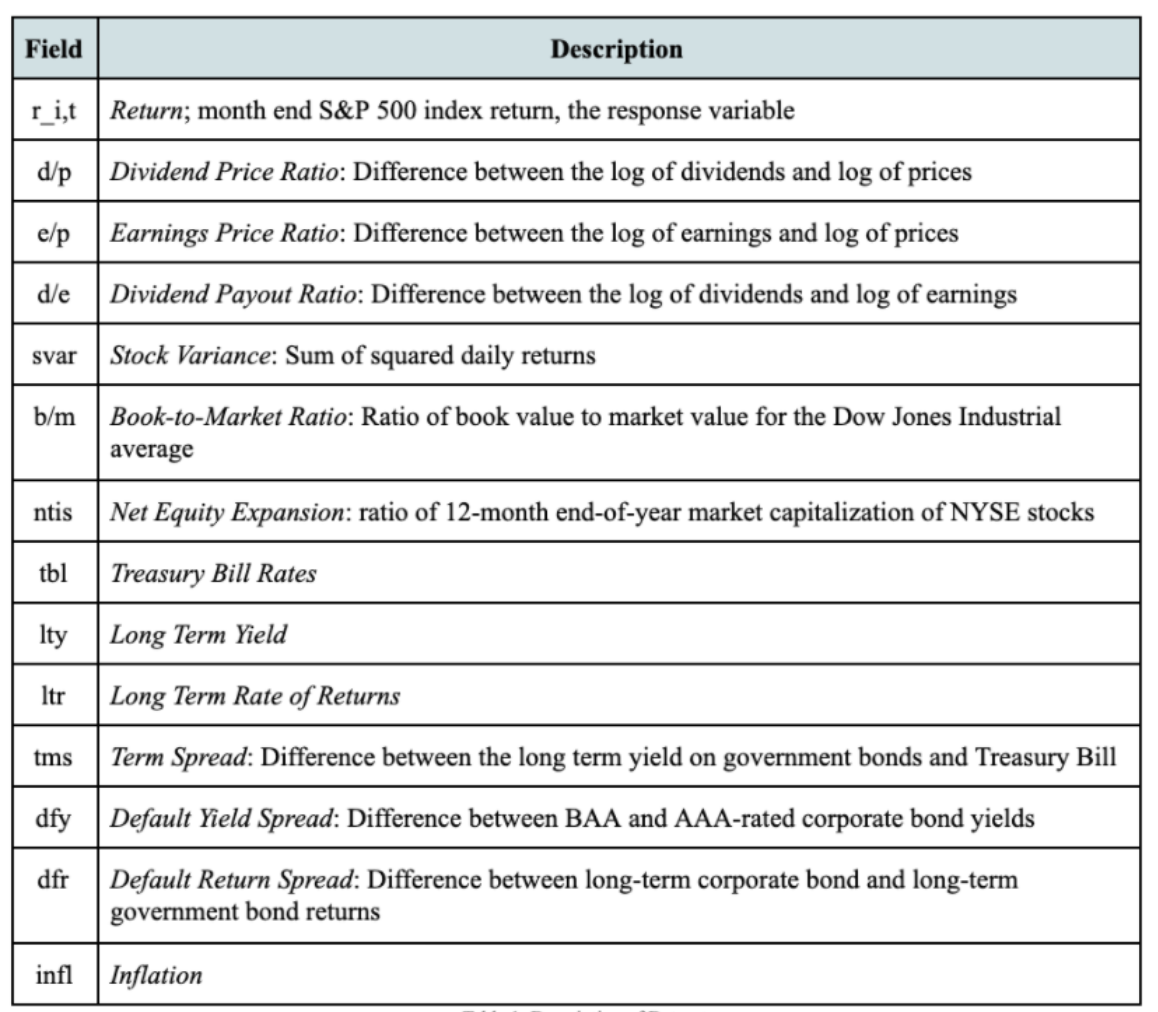

In [27]:
from IPython.display import Image
Image("Fintech_tablename.jpg")

# 2. Exploratory Data Analysis

### Referring to the correlation can give us a general guideline of the relationship between different variables. Correlation heatmap provides a clear visualization of this. 
The result from below shows that those variables that have a strong correlation(r above 0.7 or below -0.7) are the following: 

1. b/m & d/p
2. b/m & e/p
3. lty & tbl
4. e/p & d/p
5. yymm & d/p

There are no variables that show a strong corrletation against target value r_i,t

<AxesSubplot:>

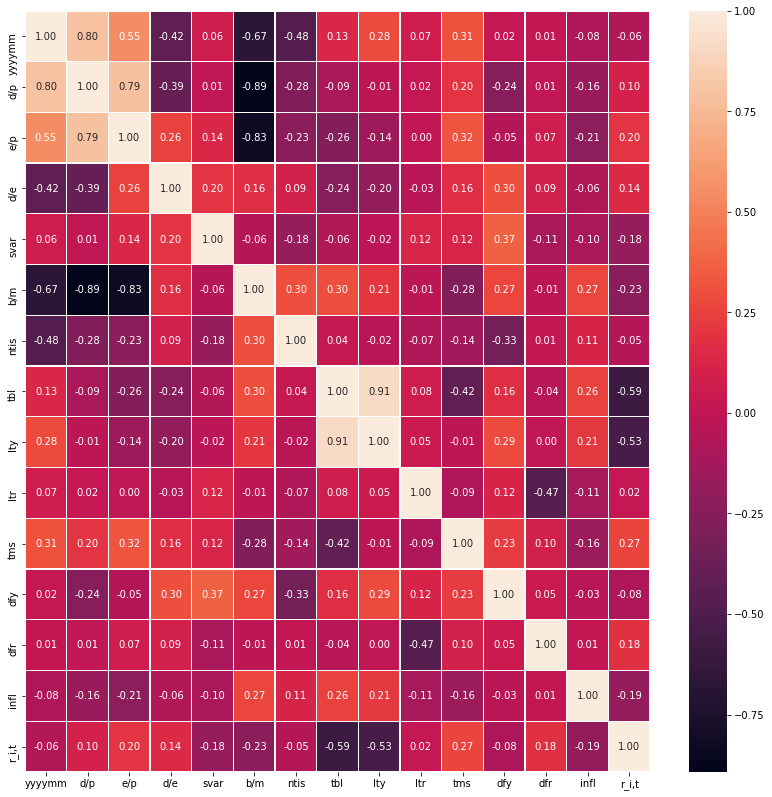

In [6]:
# final dataset for experiment
analysis_df = pd.DataFrame(pd.concat([df['yyyymm'],df['d/p'],df['e/p'],df['d/e'],
                               df['svar'],df['b/m'],df['ntis'],
                               df['tbl'],df['lty'],df['ltr'],df['tms'],
                               df['dfy'], df['dfr'],df['infl'],df['r_i,t']], axis=1))
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize = (14,14))
sns.heatmap(data = analysis_df.corr(), annot=True, fmt = '.2f', linewidths = .3)

# 3. Machine Learning Methods
We will apply different machine learning methods and pick the best model. 

For each model (except OLS and LSTM), we will select the best hyperparameters that gives out the smallest Mean Squared Error using different cross validation methods

## Ordinary Least Squares 

In [4]:
from sklearn import linear_model
from sklearn.metrics import mean_squared_error
ols = linear_model.LinearRegression()  
ols.fit(X_train, Y_train)

print('test error is ', mean_squared_error(Y_test, ols.predict(X_test)))

test error is  0.0026145508873380565


Featrue importance: 

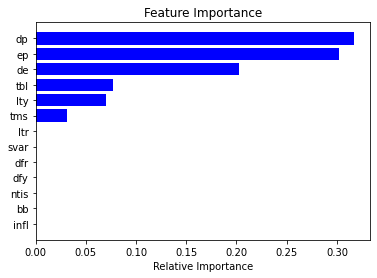

In [7]:
features = X_train.columns
importances = ols.coef_[0].copy()
# taking absolute values
for i in range(len(importances)):
    importances[i] = abs(importances[i])

# get total
sum_impt = sum(importances)    

# scale feature importance
for i in range(len(importances)):
    importances[i] = importances[i]/sum_impt
#Visualization 
indices = np.argsort(importances)

plt.title('Feature Importance')
plt.barh(range(len(indices)), importances[indices], color='b', align='center')
plt.yticks(range(len(indices)), [features[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()

## Ridge Regression

In [8]:
#prepare for 100 tuning parameters
alphas = 10**np.linspace(10,-2,100)*0.5

#train
ridgecv = linear_model.RidgeCV(alphas = alphas, scoring = 'neg_mean_squared_error', store_cv_values=True)
ridgecv.fit(X_train, Y_train)
print('chosen alpha is ', ridgecv.alpha_)
cv_mse = np.mean(ridgecv.cv_values_, axis=0)
print('minimum test error is ', cv_mse.min())

chosen alpha is  21.643806405415308
minimum test error is  -4.521362065237295e-05


In [9]:
ridge_final = linear_model.Ridge(alpha = ridgecv.alpha_)
ridge_final.fit(X_train, Y_train)
print('test error is ', mean_squared_error(Y_test, ridge_final.predict(X_test)))

test error is  0.0023174968115303096


Featue Importance: 

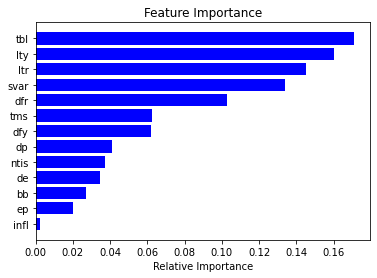

In [10]:
features = X_train.columns
importances = ridge_final.coef_[0].copy()
# taking absolute values
for i in range(len(importances)):
    importances[i] = abs(importances[i])

# get total
sum_impt = sum(importances)    

# scale feature importance
for i in range(len(importances)):
    importances[i] = importances[i]/sum_impt
indices = np.argsort(importances)

plt.title('Feature Importance')
plt.barh(range(len(indices)), importances[indices], color='b', align='center')
plt.yticks(range(len(indices)), [features[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()

## Lasso

In [11]:
lassocv = linear_model.LassoCV(alphas = None, cv = 5, max_iter = 100000)
lassocv.fit(X_train, Y_train)

print('chosen alpha is ', lassocv.alpha_)
cv_mse = np.mean(lassocv.mse_path_, axis=0)
print('minimum test error is ', cv_mse.min())

chosen alpha is  0.0012532133203693727
minimum test error is  0.0012921820664234737


/Users/kanghyojeong/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:1109: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [12]:
lasso_final = linear_model.Lasso(alpha=lassocv.alpha_)
lasso_final.fit(X_train, Y_train)
print('test error is ', mean_squared_error(Y_test, lasso_final.predict(X_test)))

test error is  0.0018097461713533834


Feature importance: 

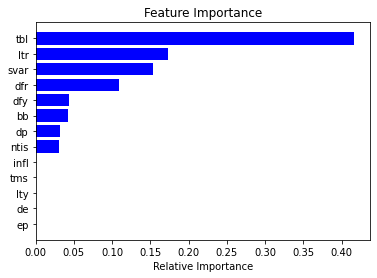

In [13]:
features = X_train.columns
importances = lasso_final.coef_.copy()
# taking absolute values
for i in range(len(importances)):
    importances[i] = abs(importances[i])

# get total
sum_impt = sum(importances)    

# scale feature importance
for i in range(len(importances)):
    importances[i] = importances[i]/sum_impt
indices = np.argsort(importances)

plt.title('Feature Importance')
plt.barh(range(len(indices)), importances[indices], color='b', align='center')
plt.yticks(range(len(indices)), [features[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()

## Support Vector Regression

In [15]:
from sklearn.model_selection import GridSearchCV
from sklearn import svm

parameter_candidates = [{'kernel': ['linear'], 'C': [1, 10, 100, 1000]}]


svrcv = GridSearchCV(estimator=svm.SVR(), param_grid=parameter_candidates, cv=10, n_jobs=-1)
svrcv.fit(X_train, Y_train)   

print('Best parameters:',svrcv.best_params_) 

/Users/kanghyojeong/anaconda3/lib/python3.6/site-packages/sklearn/model_selection/_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)
/Users/kanghyojeong/anaconda3/lib/python3.6/site-packages/sklearn/utils/validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Best parameters: {'C': 100, 'kernel': 'linear'}


In [16]:
svr_final = svm.SVR(C=1, kernel='linear')
svr_final.fit(X_train, Y_train)

print('test error is ', mean_squared_error(Y_test, svr_final.predict(X_test)))

test error is  0.0029527370507405767


/Users/kanghyojeong/anaconda3/lib/python3.6/site-packages/sklearn/utils/validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Feature importance: 

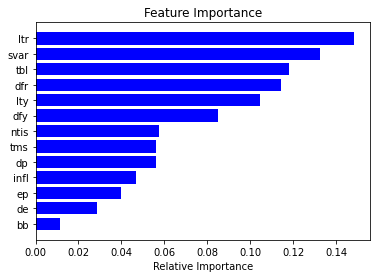

In [17]:
features = X_train.columns
importances = svr_final.coef_[0].copy()
# taking absolute values
for i in range(len(importances)):
    importances[i] = abs(importances[i])

# get total
sum_impt = sum(importances)    

# scale feature importance
for i in range(len(importances)):
    importances[i] = importances[i]/sum_impt
indices = np.argsort(importances)

plt.title('Feature Importance')
plt.barh(range(len(indices)), importances[indices], color='b', align='center')
plt.yticks(range(len(indices)), [features[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()

## Random Forest

In [29]:
# Use the random grid to search for best hyperparameters
# First create the base model to tune
rf = RandomForestRegressor()

# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 10, stop = 1000, num = 100)]
# Number of features to consider at every split
max_features = ['auto', 'sqrt']
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(10, 110, num = 11)]
max_depth.append(None)
# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 4]
# Method of selecting samples for training each tree
bootstrap = [True, False]
# Create the random grid
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}


# Random search of parameters, using 3 fold cross validation, 
# search across 100 different combinations, and use all available cores
rf_random = RandomizedSearchCV(estimator = rf, param_distributions = random_grid, n_iter = 100, cv = 3, verbose=2, random_state=42, n_jobs = -1)
# Fit the random search model
rf_random.fit(X_train, Y_train)

Fitting 3 folds for each of 100 candidates, totalling 300 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  33 tasks      | elapsed:   39.4s
[Parallel(n_jobs=-1)]: Done 154 tasks      | elapsed:  3.3min
[Parallel(n_jobs=-1)]: Done 300 out of 300 | elapsed:  6.0min finished
/Users/kanghyojeong/anaconda3/lib/python3.6/site-packages/sklearn/model_selection/_search.py:715: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.best_estimator_.fit(X, y, **fit_params)


RandomizedSearchCV(cv=3, error_score='raise-deprecating',
                   estimator=RandomForestRegressor(bootstrap=True,
                                                   criterion='mse',
                                                   max_depth=None,
                                                   max_features='auto',
                                                   max_leaf_nodes=None,
                                                   min_impurity_decrease=0.0,
                                                   min_impurity_split=None,
                                                   min_samples_leaf=1,
                                                   min_samples_split=2,
                                                   min_weight_fraction_leaf=0.0,
                                                   n_estimators='warn',
                                                   n_jobs=None, oob_score=False,
                                                   random_sta...


Let's get the best parameters we can use: 

In [9]:
rf_random.best_params_

{'n_estimators': 30,
 'min_samples_split': 5,
 'min_samples_leaf': 1,
 'max_features': 'auto',
 'max_depth': 90,
 'bootstrap': True}

Now, we simply insert the given value into the model: 

In [6]:
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import scale 

RF = RandomForestRegressor(n_estimators=30,
                                   min_samples_split = 5,
                                   min_samples_leaf = 1,
                                   max_features = 'auto',
                                   max_depth = 90,
                                   bootstrap = True)
RF.fit(X_train, Y_train)
RF_prediction = RF.predict(scale(X_test))

# print("RF MSE: ",np.mean((Y_test - RF_prediction)**2))


/Users/kanghyojeong/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:10: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  # Remove the CWD from sys.path while we load stuff.


Calculate MSE for train and test: 

The result is fair. Difference between training and test is not too large. This means we are not overfitting the data. 

In [8]:
from sklearn.metrics import mean_squared_error

RF = RandomForestRegressor(n_estimators=30,
                                   min_samples_split = 5,
                                   min_samples_leaf = 1,
                                   max_features = 'auto',
                                   max_depth = 90,
                                   bootstrap = True)
RF.fit(X_train, Y_train)
print('mse train: ', mean_squared_error(RF.predict(X_train), Y_train))
print('mse test: ', mean_squared_error(RF.predict(X_test), Y_test))


/Users/kanghyojeong/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:9: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  if __name__ == '__main__':


mse train:  0.0003540928746077627
mse test:  0.002027933477798172


Let's figure out the feature importances for this model: 

In [9]:
sorted(RF.feature_importances_, reverse=True)

[0.39523046696672864,
 0.11533480017486594,
 0.0981135207334667,
 0.06630039684199077,
 0.057488181587724646,
 0.049078218644496,
 0.04021187985347431,
 0.032323153252975065,
 0.03178375711552642,
 0.031120687345567746,
 0.03002777559404422,
 0.0278704756349203,
 0.025116686254219266]

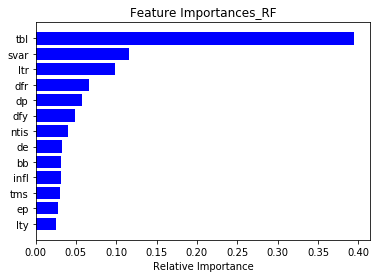

In [10]:
features = X_train.columns
importances = RF.feature_importances_
indices = np.argsort(importances)

import matplotlib.pyplot as plt 
plt.title('Feature Importances_RF')
plt.barh(range(len(indices)), importances[indices], color='b', align='center')
plt.yticks(range(len(indices)), [features[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()

# GBRT (Gradient Boosting Regression Tree)

In [35]:
from sklearn.ensemble import GradientBoostingRegressor  #GBM algorithm
from sklearn.model_selection import GridSearchCV   #Perforing grid search

In [87]:

param_grid = {'learning_rate': [0.1, 0.05, 0.02, 0.01],
              'n_estimators' : n_estimators,
              'max_depth' : max_depth,
              }

est = GradientBoostingRegressor()
# this may take some minutes
gs_cv = GridSearchCV(est, param_grid,  cv = 3, verbose=2, n_jobs = -1).fit(X_train, Y_train)

# best hyperparameter setting
gs_cv.best_params_

Fitting 3 folds for each of 4800 candidates, totalling 14400 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  33 tasks      | elapsed:    5.5s
[Parallel(n_jobs=-1)]: Done 154 tasks      | elapsed:   24.2s
[Parallel(n_jobs=-1)]: Done 357 tasks      | elapsed:  1.1min
[Parallel(n_jobs=-1)]: Done 640 tasks      | elapsed:  2.2min
[Parallel(n_jobs=-1)]: Done 1005 tasks      | elapsed:  3.5min
[Parallel(n_jobs=-1)]: Done 1450 tasks      | elapsed:  5.1min
[Parallel(n_jobs=-1)]: Done 1977 tasks      | elapsed:  7.0min
[Parallel(n_jobs=-1)]: Done 2584 tasks      | elapsed:  9.6min
[Parallel(n_jobs=-1)]: Done 3273 tasks      | elapsed: 12.2min
[Parallel(n_jobs=-1)]: Done 4042 tasks      | elapsed: 16.5min
[Parallel(n_jobs=-1)]: Done 4893 tasks      | elapsed: 22.2min
[Parallel(n_jobs=-1)]: Done 5824 tasks      | elapsed: 28.4min
[Parallel(n_jobs=-1)]: Done 6837 tasks      | elapsed: 35.3min
[Parallel(n_jobs=-1)]: Done 7930 tasks      | elapsed: 47.0min
[Parallel(n_jobs=-1)]: Done 9105 tasks      | 

{'learning_rate': 0.01, 'max_depth': 10, 'n_estimators': 80}

In [36]:
# from sklearn.preprocessing import scale 

GBR = GradientBoostingRegressor(n_estimators=80,
                             learning_rate = 0.01,
                             max_depth = 10)
GBR.fit(X_train, Y_train)
print('mse train: ', mean_squared_error(GBR.predict(X_train), Y_train)) 
print('mse test: ', mean_squared_error(GBR.predict(X_test), Y_test))
# RF_prediction = RF.predict(scale(X_test))
# print("RF MSE: ",np.mean((Y_test - RF_prediction)**2))

/Users/kanghyojeong/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/gradient_boosting.py:1450: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


mse train:  0.0008831259751274344
mse test:  0.0018647768666301353


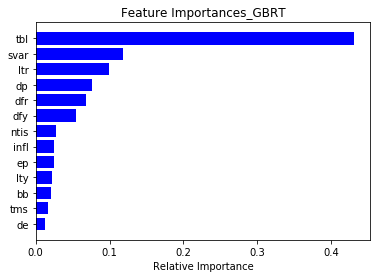

[0.4311287339138006, 0.1183427217034001, 0.0990175243336625, 0.07673649967666826, 0.0688271365077089, 0.05510869728916809, 0.02826341484295964, 0.02557225659344512, 0.024819647343821454, 0.021744166308008236, 0.02054528792954737, 0.016775718796286154, 0.013118194761523648]


In [48]:
features = X_train.columns
importances = GBR.feature_importances_
indices = np.argsort(importances)

plt.title('Feature Importances_GBRT')
plt.barh(range(len(indices)), importances[indices], color='b', align='center')
plt.yticks(range(len(indices)), [features[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()

print(sorted(importances, reverse=True))

# LSTM

For LSTM, we set the architecture as the following: 

- Activation: ReLU
- Optimize computation by using: SGD
- Initialize random seeds
- Try 5 different models, each one with different layers and neurons:
    - NN1: 1 layer, 32 neurons
    - NN2: 2 layers, 32, 16 neurons
    - NN3: 3 layers, 32, 16, 8 neruons
    - NN4: 4 layers, 32, 16, 8, 4 neurons
    - NN5: 5 layers, 32, 16, 8, 4, 2 neurons


In [18]:
X_train = X_train.values
X_test = X_test.values
Y_train = Y_train.values
Y_test = Y_test.values
print(X_train.shape)
print(Y_train.shape)

(744, 13)
(744, 1)


In [19]:
X_train_t = X_train.reshape(X_train.shape[0],13,1)
X_test_t = X_test.reshape(X_test.shape[0],13,1)
print("X_train_t shape: ", X_train_t.shape)

X_train_t shape:  (744, 13, 1)


NN1: 

In [20]:
from keras.layers import LSTM 
from keras.models import Sequential 
from keras.layers import Dense 
import keras.backend as K 
from keras.callbacks import EarlyStopping 

K.clear_session() 
model = Sequential() # Sequeatial Model 
model.add(LSTM(32, 
               input_shape=(13, 1),
              activation ='relu',
              recurrent_activation='relu',
              kernel_initializer = 'random_normal',
              )) # (timestep, feature) 
model.add(Dense(1)) # output = 1 
model.compile(loss='mean_squared_error', optimizer='SGD') 
model.summary()

Using TensorFlow backend.


Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_1 (LSTM)                (None, 32)                4352      
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 33        
Total params: 4,385
Trainable params: 4,385
Non-trainable params: 0
_________________________________________________________________


NN2: 

In [21]:
K.clear_session()
model2 = Sequential() # Sequeatial Model
model2.add(LSTM(32,
               input_shape=(13, 1),
              activation ='relu',
              recurrent_activation='relu',
              kernel_initializer = 'random_normal',
                return_sequences=True
              )) # (timestep, feature)
model2.add(LSTM(16,
               input_shape=(13, 1),
              activation ='relu',
              recurrent_activation='relu',
              kernel_initializer = 'random_normal'
              )) # (timestep, feature)
model2.add(Dense(1)) # output = 1
model2.compile(loss='mean_squared_error', optimizer='SGD')
model2.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_1 (LSTM)                (None, 13, 32)            4352      
_________________________________________________________________
lstm_2 (LSTM)                (None, 16)                3136      
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 17        
Total params: 7,505
Trainable params: 7,505
Non-trainable params: 0
_________________________________________________________________


NN3: 

In [22]:
K.clear_session()
model3 = Sequential() # Sequeatial Model
model3.add(LSTM(32,
               input_shape=(13, 1),
              activation ='relu',
              recurrent_activation='relu',
              kernel_initializer = 'random_normal',
                return_sequences=True
              )) # (timestep, feature)
model3.add(LSTM(16,
               input_shape=(13, 1),
              activation ='relu',
              recurrent_activation='relu',
              kernel_initializer = 'random_normal',
                return_sequences=True
              )) # (timestep, feature)
model3.add(LSTM(8,
               input_shape=(13, 1),
              activation ='relu',
              recurrent_activation='relu',
              kernel_initializer = 'random_normal'
              )) # (timestep, feature)
model3.add(Dense(1)) # output = 1
model3.compile(loss='mean_squared_error', optimizer='SGD')
model3.summary()

score = model3.evaluate(X_test_t, Y_test, batch_size=30)
print("score: ", score) #MSE

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_1 (LSTM)                (None, 13, 32)            4352      
_________________________________________________________________
lstm_2 (LSTM)                (None, 13, 16)            3136      
_________________________________________________________________
lstm_3 (LSTM)                (None, 8)                 800       
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 9         
Total params: 8,297
Trainable params: 8,297
Non-trainable params: 0
_________________________________________________________________
240/240 [==============================] - 0s 1ms/step
score:  0.002390509660472162


NN4: 

In [24]:
K.clear_session()
model4 = Sequential() # Sequeatial Model
model4.add(LSTM(32,
               input_shape=(13, 1),
              activation ='relu',
              recurrent_activation='relu',
              kernel_initializer = 'random_normal',
                return_sequences=True
              )) # (timestep, feature)
model4.add(LSTM(16,
               input_shape=(13, 1),
              activation ='relu',
              recurrent_activation='relu',
              kernel_initializer = 'random_normal',
                return_sequences=True
              )) # (timestep, feature)
model4.add(LSTM(8,
               input_shape=(13, 1),
              activation ='relu',
              recurrent_activation='relu',
              kernel_initializer = 'random_normal',
                return_sequences=True
              )) # (timestep, feature)
model4.add(LSTM(4,
               input_shape=(13, 1),
              activation ='relu',
              recurrent_activation='relu',
              kernel_initializer = 'random_normal'
              )) # (timestep, feature)
model4.add(Dense(1)) # output = 1
model4.compile(loss='mean_squared_error', optimizer='SGD')
model4.summary()

score = model4.evaluate(X_test_t, Y_test, batch_size=30)
print("score: ", score) #MSE

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_1 (LSTM)                (None, 13, 32)            4352      
_________________________________________________________________
lstm_2 (LSTM)                (None, 13, 16)            3136      
_________________________________________________________________
lstm_3 (LSTM)                (None, 13, 8)             800       
_________________________________________________________________
lstm_4 (LSTM)                (None, 4)                 208       
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 5         
Total params: 8,501
Trainable params: 8,501
Non-trainable params: 0
_________________________________________________________________
240/240 [==============================] - 0s 1ms/step
score:  0.002390509660472162


NN5: 

In [25]:
K.clear_session()
model5 = Sequential() # Sequeatial Model
model5.add(LSTM(32,
               input_shape=(13, 1),
              activation ='relu',
              recurrent_activation='relu',
              kernel_initializer = 'random_normal',
                return_sequences=True
              )) # (timestep, feature)
model5.add(LSTM(16,
               input_shape=(13, 1),
              activation ='relu',
              recurrent_activation='relu',
              kernel_initializer = 'random_normal',
                return_sequences=True
              )) # (timestep, feature)
model5.add(LSTM(8,
               input_shape=(13, 1),
              activation ='relu',
              recurrent_activation='relu',
              kernel_initializer = 'random_normal',
                return_sequences=True
              )) # (timestep, feature)
model5.add(LSTM(4,
               input_shape=(13, 1),
              activation ='relu',
              recurrent_activation='relu',
              kernel_initializer = 'random_normal',
                return_sequences=True
              ))
model5.add(LSTM(2,
               input_shape=(13, 1),
              activation ='relu',
              recurrent_activation='relu',
              kernel_initializer = 'random_normal'
              )) # (timestep, feature)
model5.add(Dense(1)) # output = 1
model5.compile(loss='mean_squared_error', optimizer='SGD')
model5.summary()

score = model5.evaluate(X_test_t, Y_test, batch_size=30)
print("score: ", score) #MSE

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_1 (LSTM)                (None, 13, 32)            4352      
_________________________________________________________________
lstm_2 (LSTM)                (None, 13, 16)            3136      
_________________________________________________________________
lstm_3 (LSTM)                (None, 13, 8)             800       
_________________________________________________________________
lstm_4 (LSTM)                (None, 13, 4)             208       
_________________________________________________________________
lstm_5 (LSTM)                (None, 2)                 56        
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 3         
Total params: 8,555
Trainable params: 8,555
Non-trainable params: 0
____________________________________________________

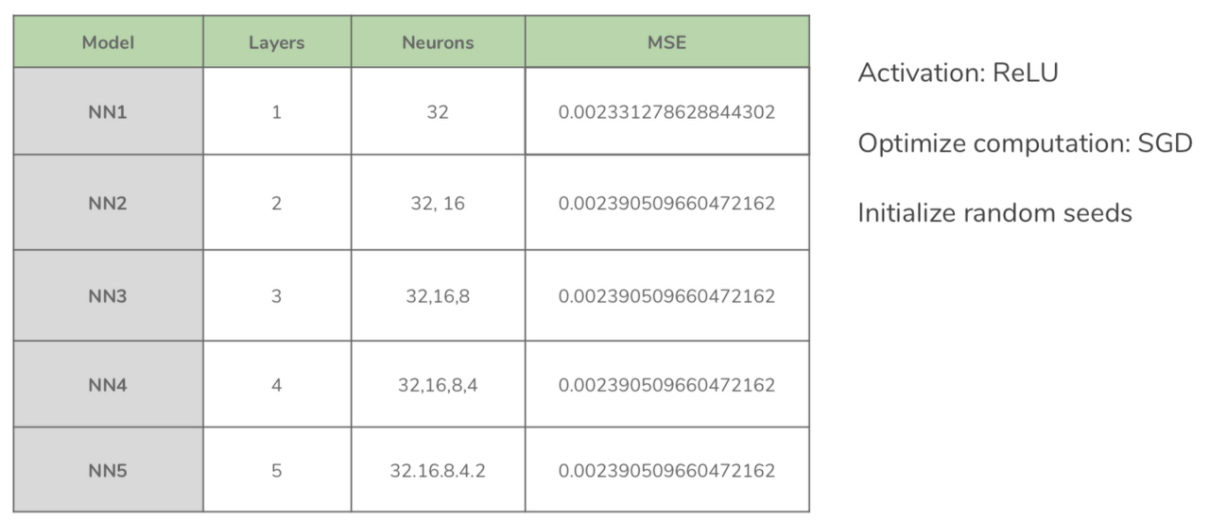

In [29]:
Image("LSTMResult.png")